<h2>Bateman Equations for Multiple Decay</h2>

The inventory of each of four compounds was calculated assuming a multi-step reaction model. These calculations require several assumptions (Eganhouse and Pontolillo, 2008), as follows: (1) reactions and loss occur through first-order kinetics; (2) the only competing reaction is loss through unspecified physical processes discussed below; and (3) rates are constant over time and uniform throughout the sediment deposit (except the physical loss rate). The time-rate of change in $DDE$ inventory was determined by dechlorination to $DDMU$ and by possible losses through other processes. Likewise, the change in $DDMU$ inventory was determined losses from dechlorination to $DDNU$, gains from dechlorination of parent $DDE$, and losses by other processes. $DDNU$ inventory changes were analogous, with losses to an unspecified compound, gains from parent $DDMU$, and possible losses through other processes. The inventory of the final, unspecified product changes with gains from transformation of $DDMU$ and possible losses to other processes. The coupled differential equations (1) are

$\begin{matrix}
\frac{d{{C}_{DDE}}}{dt}=-{{\lambda }_{DDE\to DDMU}}{{C}_{DDE}}-{{\lambda }_{Loss}}{{C}_{DDE}}  \\
   \frac{d{{C}_{DDMU}}}{dt}=-{{\lambda }_{DDMU\to DDNS}}{{C}_{DDMU}}+{{\lambda }_{DDE\to DDMU}}{{C}_{DDE}}-{{\lambda }_{Loss}}{{C}_{DDMU}}  \\
   \frac{d{{C}_{DDNU}}}{dt}=-{{\lambda }_{DDNU\to ?}}{{C}_{DDNU}}+{{\lambda }_{DDMU\to DDNU}}{{C}_{DDMU}}-{{\lambda }_{Loss}}{{C}_{DDNU}}  \\
   \frac{d{{C}_{UN}}}{dt}={{\lambda }_{DDNU\to UN}}{{C}_{DDNU}}-{{\lambda }_{Loss}}{{C}_{UN}}  \\
\end{matrix}$

where the molar concentrations $C$ [$\mu$mol/kg dry sediment] of each compound and the transformation rate coefficients  [y-1] are labeled with subscripts. The losses to other processes accounted for physical removal of compounds from the sediment. Processes that have been suggested include direct desorption, resuspension and desorption, desorption into porewater and irrigation, and uptake by benthic deposit feeders. We have assumed that the combined rate coefficient for these processes applies equally to all four compounds. 


Shape of the final concentration matrix:  (50L, 4L)


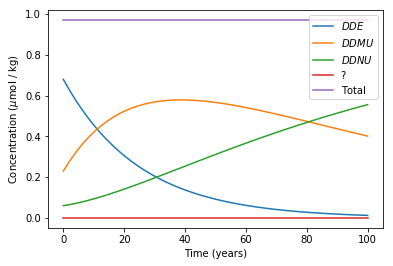

In [7]:
from scipy.integrate import odeint
from pylab import *
%matplotlib inline

# decay rates are global so they can be seen inside the function 
global lam
lam = array([.04, .01, .000, .0])

# define a function to represent coupled ordinary differential eqns.
def dcdt(c,t):
    dfdt = np.zeros(4)
    dfdt[0] = c[0]* -lam[0] - c[0]*lam[3]
    dfdt[1] = c[1]* -lam[1] + c[0]*lam[0] - c[1]*lam[3] 
    dfdt[2] = c[2]* -lam[2] + c[1]*lam[1] - c[2]*lam[3]
    dfdt[3] =                 c[2]*lam[2] - c[3]*lam[3]
    return dfdt
    
# intial concentration for four constituents
C0 = array([.68, .23, .06, 0.])
# time array
t = linspace(0.0,100.,50)
# call 
C = odeint(dcdt,C0,t)

print "Shape of the final concentration matrix: ",shape(C)
fig = plt.figure()
plt.plot(t,C[:,0],label='$DDE$')
plt.plot(t,C[:,1],label='$DDMU$')
plt.plot(t,C[:,2],label='$DDNU$')
plt.plot(t,C[:,3],label='?')
plt.plot(t,np.sum(C,1),label='Total')
plt.xlabel('Time (years)')
plt.ylabel('Concentration ($\mu$mol / kg)')
plt.legend(loc='upper right')

In [2]:
whos

Variable                     Type                          Data/Info
--------------------------------------------------------------------
ALLOW_THREADS                int                           1
Annotation                   type                          <class 'matplotlib.text.Annotation'>
Arrow                        type                          <class 'matplotlib.patches.Arrow'>
Artist                       type                          <class 'matplotlib.artist.Artist'>
AutoLocator                  type                          <class 'matplotlib.ticker.AutoLocator'>
Axes                         type                          <class 'matplotlib.axes._axes.Axes'>
BUFSIZE                      int                           8192
Button                       type                          <class 'matplotlib.widgets.Button'>
C                            ndarray                       50Lx4L: 200 elems, type `float64`, 1600 bytes
C0                           ndarray                      